In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
train = pd.read_csv("Google_Stock_Price_Train.csv")

In [5]:
train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [6]:
train_set = train.iloc[:,1:2].values

In [7]:
train_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [8]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

In [9]:
sc = MinMaxScaler(feature_range=(0,1),copy=True)
# The default arguments are used
# 0 and 1 are used because after normalization, we want all our stock prices to be between 0 and 1

In [10]:
train_set_scale = sc.fit_transform(train_set)

In [11]:
train_set_scale

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [32]:
X_train = []
y_train = []

In [33]:
# Creating a data structure with 60 timesteps and 1 output
for i in range(60,1258):
    X_train.append(train_set_scale[i-60:i,0])
    y_train.append(train_set_scale[i,0])

In [34]:
X_train,y_train = np.array(X_train),np.array(y_train)

In [35]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [36]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [38]:
# Initializing the RNN
regressor = Sequential()

In [39]:
# Adding the first LSTM layer and some dropout regularization to avoid overfitting
regressor.add(LSTM(units = 50,return_sequences=True,input_shape = (X_train.shape[1],1)))


In [40]:
regressor.add(Dropout(rate = 0.2))

In [41]:
# Adding the second LSTM layer and some dropout regularization to avoid overfitting
regressor.add(LSTM(units = 50,return_sequences=True))
regressor.add(Dropout(rate = 0.2))

In [42]:
# Adding the third LSTM layer and some dropout regularization to avoid overfitting
regressor.add(LSTM(units = 50,return_sequences=True))
regressor.add(Dropout(rate = 0.2))

In [43]:
# Adding the fourth LSTM layer and some dropout regularization to avoid overfitting
regressor.add(LSTM(units = 50))
regressor.add(Dropout(rate = 0.2))

In [44]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [45]:
# Compiling the RNN
regressor.compile(optimizer = "adam",loss = "mean_squared_error")

In [46]:
regressor.fit(X_train,y_train,epochs = 100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 19s 104ms/step - loss: 0.0387
Epoch 2/100
38/38 [==============================] - 4s 101ms/step - loss: 0.0060
Epoch 3/100
38/38 [==============================] - 4s 101ms/step - loss: 0.0049
Epoch 4/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0050
Epoch 5/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0052 1s - 
Epoch 6/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0047
Epoch 7/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0045
Epoch 8/100
38/38 [==============================] - 4s 100ms/step - loss: 0.0046
Epoch 9/100
38/38 [==============================] - 4s 98ms/step - loss: 0.0047
Epoch 10/100
38/38 [==============================] - 4s 103ms/step - loss: 0.0049 1s -
Epoch 11/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0047
Epoch 12/100
38/38 [==============================] - 4s 100ms/step - loss: 0.0040
Ep

In [48]:
test = pd.read_csv("Google_Stock_Price_Test.csv")
test_set = test.iloc[:,1:2].values

In [49]:
test_set

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [51]:
dataset_total = pd.concat((train["Open"],test["Open"]),axis= 0)

In [54]:
inputs = dataset_total[len(dataset_total) - len(test)-60:].values

In [55]:
inputs

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [56]:
inputs = inputs.reshape(-1,1)

In [57]:
inputs

array([[779.  ],
       [779.66],
       [777.71],
       [786.66],
       [783.76],
       [781.22],
       [781.65],
       [779.8 ],
       [787.85],
       [798.24],
       [803.3 ],
       [795.  ],
       [804.9 ],
       [816.68],
       [806.34],
       [801.  ],
       [808.35],
       [795.47],
       [782.89],
       [778.2 ],
       [767.25],
       [750.66],
       [774.5 ],
       [783.4 ],
       [779.94],
       [791.17],
       [756.54],
       [755.6 ],
       [746.97],
       [755.2 ],
       [766.92],
       [771.37],
       [762.61],
       [772.63],
       [767.73],
       [764.26],
       [760.  ],
       [771.53],
       [770.07],
       [757.44],
       [744.59],
       [757.71],
       [764.73],
       [761.  ],
       [772.48],
       [780.  ],
       [785.04],
       [793.9 ],
       [797.4 ],
       [797.34],
       [800.4 ],
       [790.22],
       [796.76],
       [795.84],
       [792.36],
       [790.9 ],
       [790.68],
       [793.7 ],
       [783.33

In [58]:
inputs = sc.transform(inputs)

In [59]:
inputs

array([[0.9299055 ],
       [0.93113327],
       [0.92750577],
       [0.94415507],
       [0.93876032],
       [0.93403527],
       [0.93483518],
       [0.9313937 ],
       [0.94636878],
       [0.96569685],
       [0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.957

In [61]:
X_test = []

In [62]:
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)


In [67]:
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [70]:
predictions = regressor.predict(X_test)
predictions = sc.inverse_transform(predictions)

In [71]:
predictions

array([[776.50433],
       [773.72174],
       [773.807  ],
       [775.156  ],
       [778.4449 ],
       [784.16895],
       [789.4285 ],
       [791.606  ],
       [791.8929 ],
       [791.5736 ],
       [791.32104],
       [791.1639 ],
       [791.12976],
       [791.73425],
       [792.68866],
       [797.04456],
       [803.62805],
       [810.72577],
       [814.59424],
       [810.6758 ]], dtype=float32)

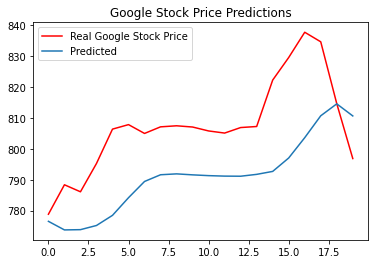

In [79]:
plt.plot(test_set,color = "red",label = "Real Google Stock Price")
plt.plot(predictions,label = "Predicted")
plt.title("Google Stock Price Predictions")
plt.legend()